<a href="https://colab.research.google.com/github/edson-depaula/DIO_BairesDev_Bootcamp/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
from PIL import Image

# Upload da imagem BMP
uploaded = files.upload()
filename = next(iter(uploaded))

Saving Lena-Söderberg.bmp to Lena-Söderberg (3).bmp


Arquivo convertido com o Convert IO (JPG -> BMP)



In [23]:
# Abrir imagem convertida para BMP
img = Image.open(filename).convert('RGB')
largura, altura = img.size

# Obter os pixels RGB manualmente
pixels_rgb = [[img.getpixel((x, y)) for x in range(largura)] for y in range(altura)]

In [24]:
# 1. Converter para cinza (manual)
def para_cinza(pixels_rgb):
    pixels_cinza = []
    for linha in pixels_rgb:
        linha_cinza = []
        for r, g, b in linha:
            cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            linha_cinza.append(cinza)
        pixels_cinza.append(linha_cinza)
    return pixels_cinza

# 2. Converter para binário (manual)
def para_binario(pixels_cinza, limiar=128):
    pixels_bin = []
    for linha in pixels_cinza:
        linha_bin = [255 if px >= limiar else 0 for px in linha]
        pixels_bin.append(linha_bin)
    return pixels_bin

# 3. Criar imagem em tons de cinza a partir da matriz
def imagem_de_cinza(pixels_cinza):
    img_cinza = Image.new('L', (largura, altura))  # 'L' = 8-bit grayscale
    for y in range(altura):
        for x in range(largura):
            img_cinza.putpixel((x, y), pixels_cinza[y][x])
    return img_cinza

# 4. Criar imagem binária a partir da matriz
def imagem_binaria(pixels_binarios):
    img_bin = Image.new('L', (largura, altura))  # 'L' ainda funciona para binário (0 ou 255)
    for y in range(altura):
        for x in range(largura):
            img_bin.putpixel((x, y), pixels_binarios[y][x])
    return img_bin

In [25]:
# Aplicar conversões
pixels_cinza = para_cinza(pixels_rgb)
pixels_binarios = para_binario(pixels_cinza, limiar=128)

In [26]:
# Criar imagens
img_cinza = imagem_de_cinza(pixels_cinza)
img_bin = imagem_binaria(pixels_binarios)

Imagem original:


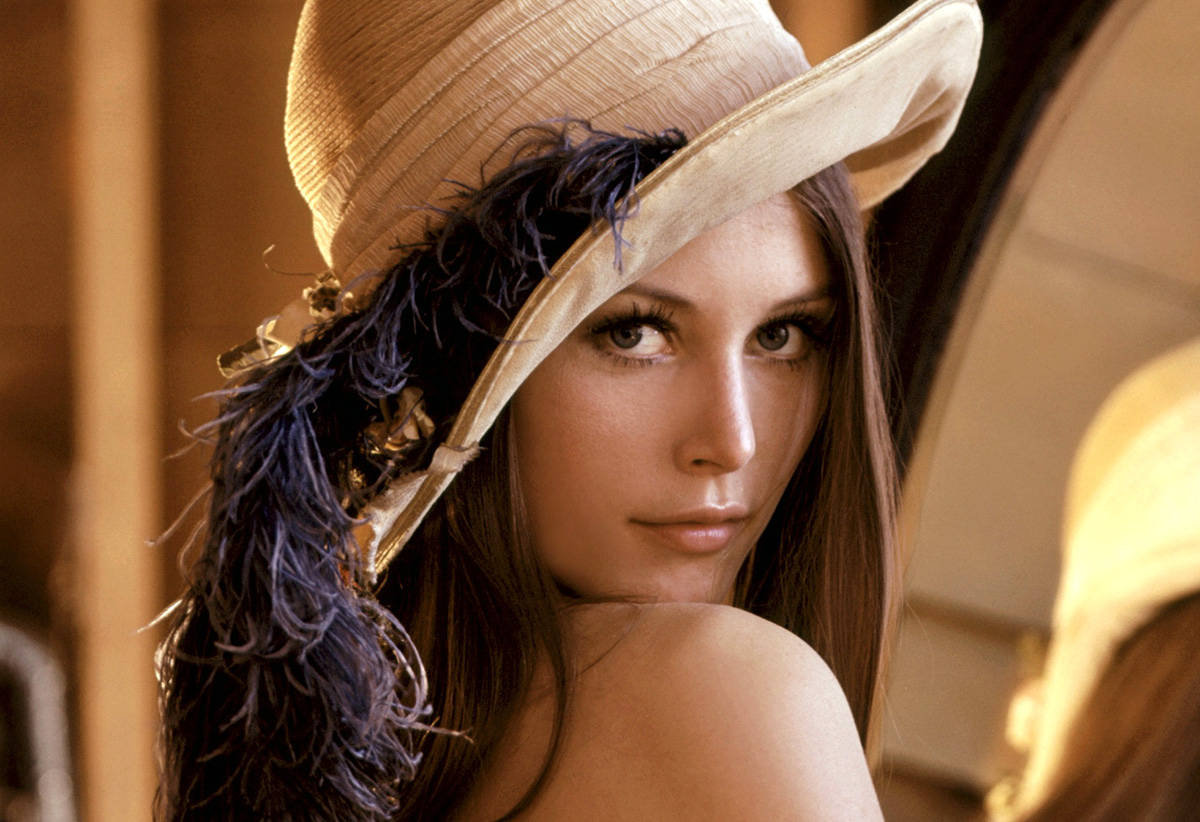

Imagem em tons de cinza:


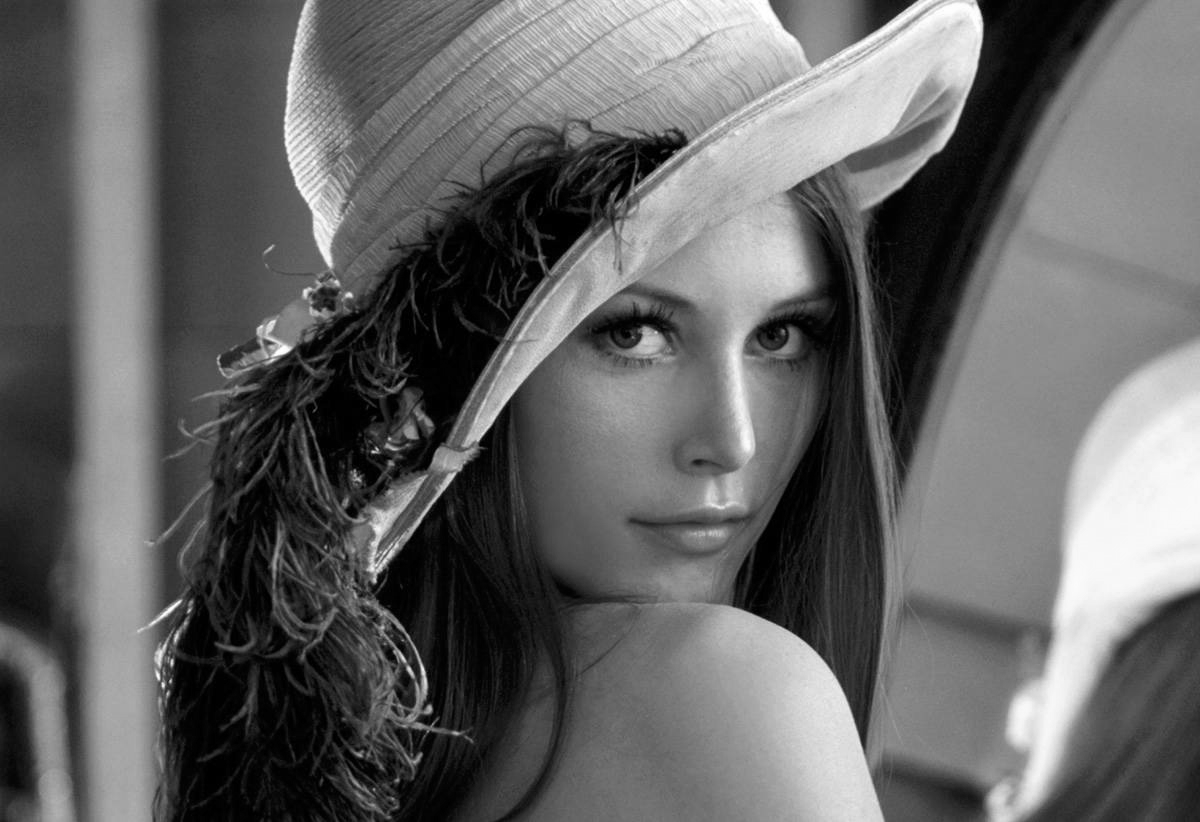

Imagem binária (preto e branco):


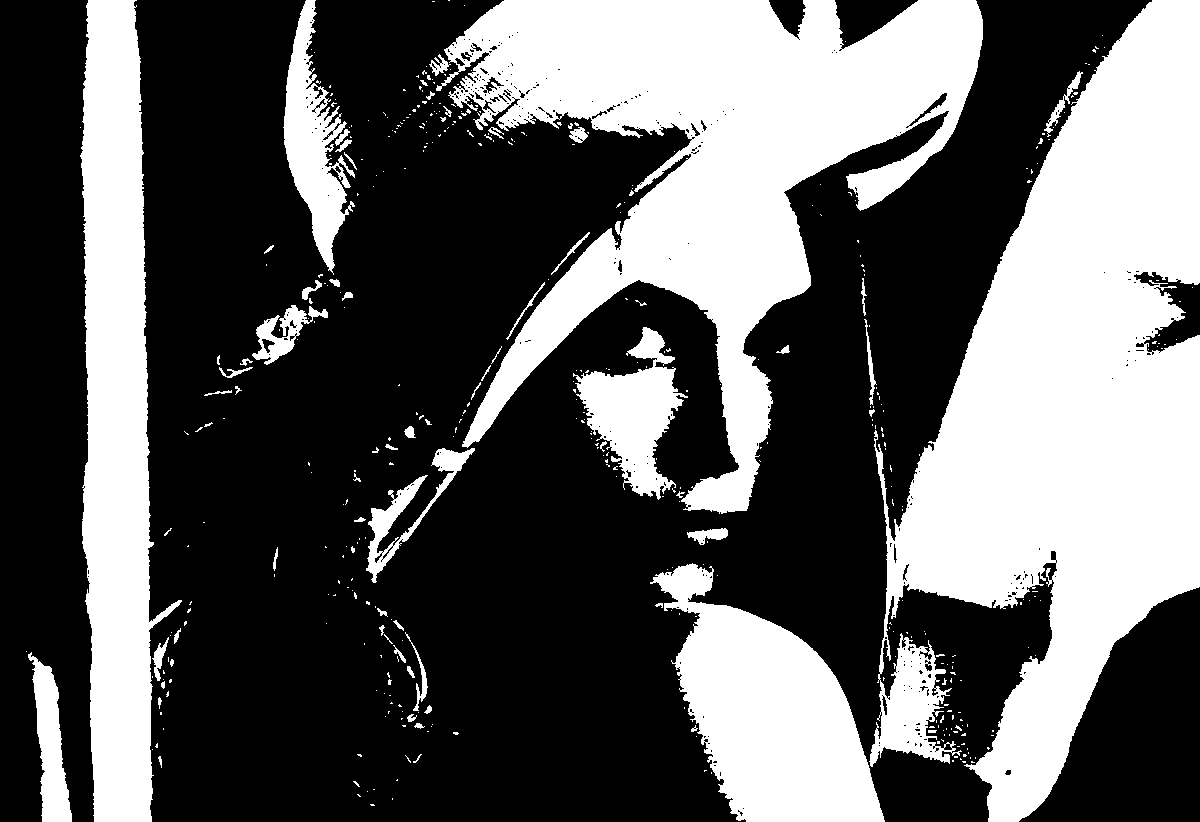

In [27]:
from IPython.display import display

print("Imagem original:")
display(img)

print("Imagem em tons de cinza:")
display(img_cinza)

print("Imagem binária (preto e branco):")
display(img_bin)

In [29]:
# Opcional: salvar as imagens
img_cinza.save("Lena Söderberg Cinza.bmp")
img_bin.save("Lena Söderberg Binaria.bmp")

print("As imagens foram geradas e salvas.")

As imagens foram geradas e salvas.
